<a href="https://colab.research.google.com/github/Prashantthhh/explainable_ai_2081_39/blob/main/Assignmenet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas scikit-learn xgboost shap matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import shap
import os

In [4]:

import pandas as pd

# Load Heart Disease dataset
dataset_path = "heart.csv"   # update with your path if needed
df = pd.read_csv(dataset_path)

# Dataset overview
print("Shape of dataset:", df.shape)
print(df.head())

# Info about columns
print("\nColumn names:", df.columns.tolist())
print("\nTarget distribution:")
print(df['target'].value_counts())

Shape of dataset: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Column names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Target distribution:
target
1    165
0    138
Name: count, dtype: int64


In [5]:
# 3.2 Median imputation (for numeric columns, if any NaN exist)
df = df.fillna(df.median(numeric_only=True))

# 3.3 Feature/target split
X = df.drop(columns=["target"])
y = df["target"]


from sklearn.model_selection import train_test_split

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train/test sizes:", X_train.shape, X_test.shape)

Train/test sizes: (242, 13) (61, 13)


In [6]:

from sklearn.model_selection import train_test_split

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train/test sizes:", X_train.shape, X_test.shape)

Train/test sizes: (242, 13) (61, 13)


In [7]:

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# 5A RandomForest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# 5B XGBoost
xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    n_estimators=200
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)


--- Random Forest ---
Accuracy: 0.8197
Precision: 0.7619
Recall: 0.9697
F1-score: 0.8533
ROC AUC: 0.908

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61



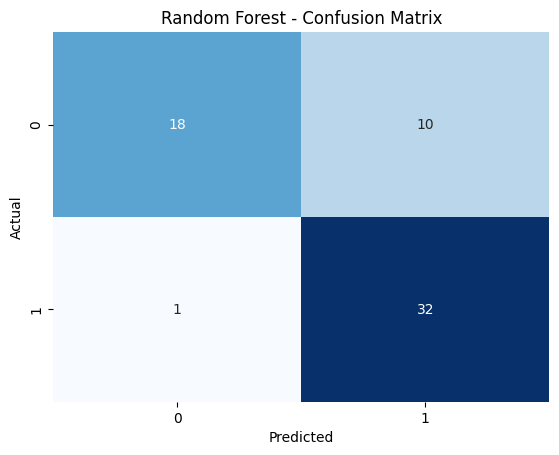


--- XGBoost ---
Accuracy: 0.7869
Precision: 0.7381
Recall: 0.9394
F1-score: 0.8267
ROC AUC: 0.8463

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.61      0.72        28
           1       0.74      0.94      0.83        33

    accuracy                           0.79        61
   macro avg       0.82      0.77      0.78        61
weighted avg       0.81      0.79      0.78        61



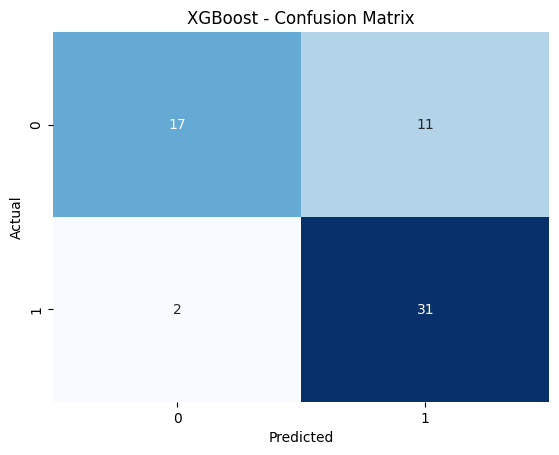

In [8]:


# 6. Evaluation
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    print(f"\n--- {name} ---")
    print("Accuracy:", round(acc, 4))
    print("Precision:", round(prec, 4))
    print("Recall:", round(rec, 4))
    print("F1-score:", round(f1, 4))
    if roc is not None:
        print("ROC AUC:", round(roc, 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate both models
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

In [9]:


explainer_model = xgb_model

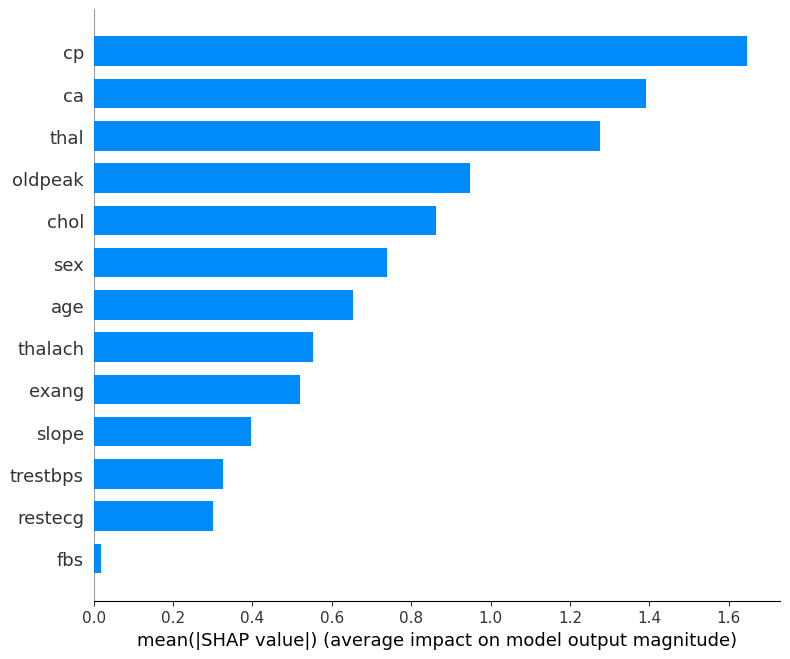

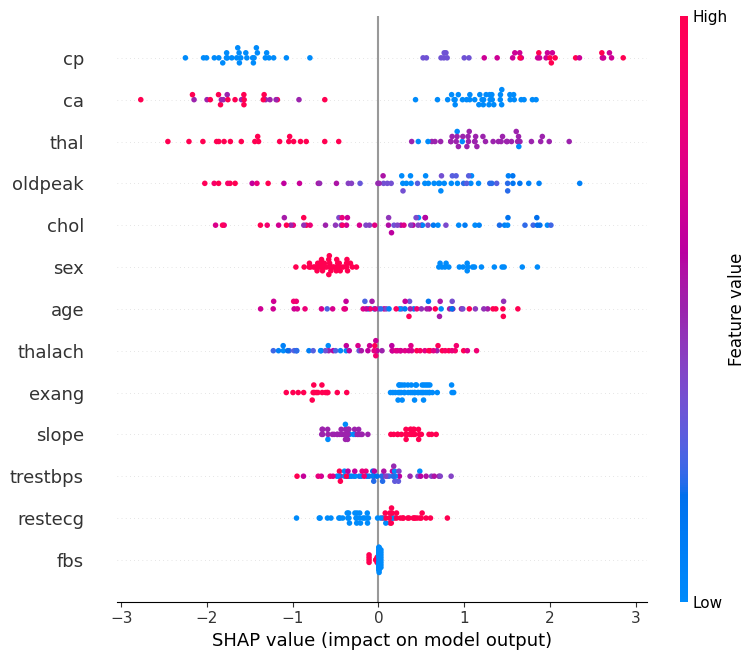

Actual label: 0
Predicted prob (Heart Disease=1): 0.009983132


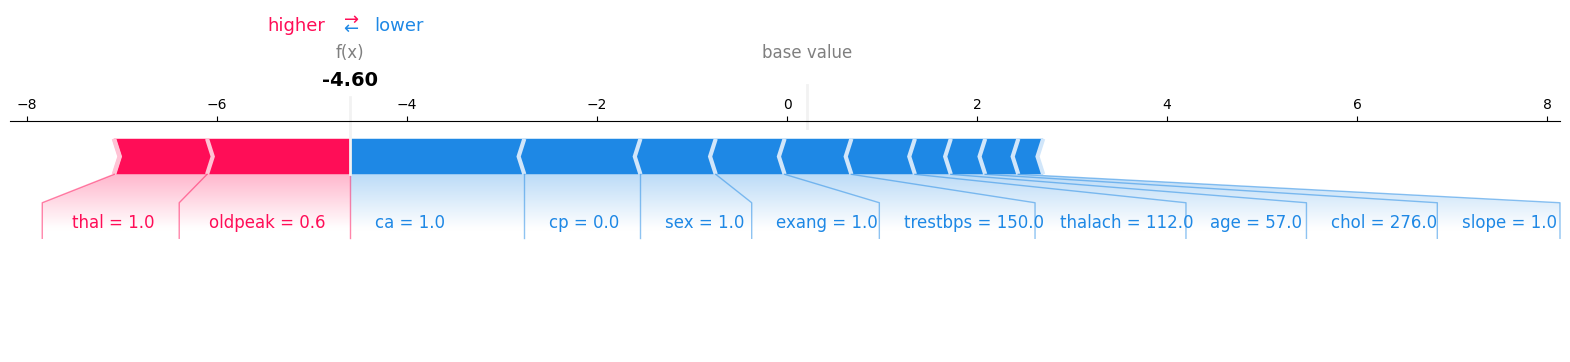

In [10]:
# 7. SHAP Analysis
shap.initjs()

# Create explainer
explainer = shap.TreeExplainer(explainer_model)
shap_values = explainer.shap_values(X_test)

# If binary classification → take shap_values for class 1 (positive class)
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# 7.1 Summary plots
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)
shap.summary_plot(shap_values, X_test, show=True)

# 7.2 Force plot for one sample
i = 0
print("Actual label:", y_test.iloc[i])
print("Predicted prob (Heart Disease=1):", explainer_model.predict_proba(X_test.iloc[[i]])[0, 1])

shap.force_plot(
    explainer.expected_value,
    shap_values[i, :],
    X_test.iloc[i, :],
    matplotlib=True
)

In [11]:
# 8. Compare Importances
try:
    # Built-in model feature importance
    built_in = explainer_model.feature_importances_
    fi = pd.Series(built_in, index=X_test.columns).sort_values(ascending=False)
    print("\nBuilt-in feature importance (top 10):")
    print(fi.head(10))

    # SHAP-based feature importance
    shap_rank = pd.Series(np.abs(shap_values).mean(axis=0), index=X_test.columns).sort_values(ascending=False)
    print("\nSHAP mean(|value|) top 10:")
    print(shap_rank.head(10))
except Exception as e:
    print("Could not get built-in importances:", e)


Built-in feature importance (top 10):
cp          0.286605
thal        0.114413
ca          0.113389
exang       0.086800
fbs         0.074520
oldpeak     0.067654
sex         0.062973
slope       0.041195
age         0.033391
trestbps    0.031456
dtype: float32

SHAP mean(|value|) top 10:
cp         1.646680
ca         1.390387
thal       1.275605
oldpeak    0.948745
chol       0.861598
sex        0.738181
age        0.652417
thalach    0.552062
exang      0.519490
slope      0.396842
dtype: float32


In [12]:
# 9. Top-5 SHAP Features
shap_importance = pd.Series(
    np.abs(shap_values).mean(axis=0),
    index=X_test.columns
).sort_values(ascending=False)

top5 = shap_importance.head(5)

print("\nTop-5 SHAP features:")
print(top5)

# Correlation between feature values and SHAP values
for feat in top5.index:
    vals = X_test[feat]
    corr = np.corrcoef(vals, shap_values[:, X_test.columns.get_loc(feat)])[0, 1]
    print(f"Feature: {feat}, correlation between value and SHAP: {corr:.3f}")



Top-5 SHAP features:
cp         1.646680
ca         1.390387
thal       1.275605
oldpeak    0.948745
chol       0.861598
dtype: float32
Feature: cp, correlation between value and SHAP: 0.939
Feature: ca, correlation between value and SHAP: -0.860
Feature: thal, correlation between value and SHAP: -0.763
Feature: oldpeak, correlation between value and SHAP: -0.837
Feature: chol, correlation between value and SHAP: -0.689



Completed. Files saved:
 - heart_shap_summary_bar.png
 - heart_shap_feature_importance.csv


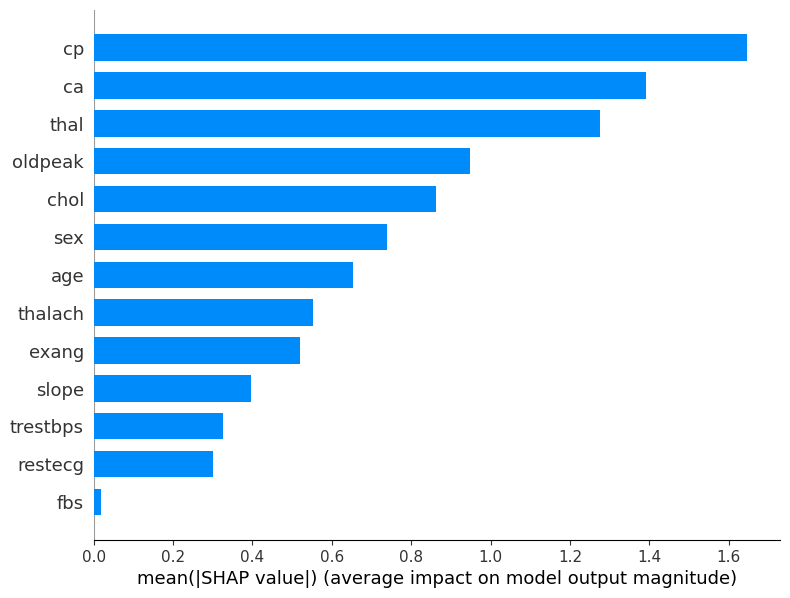

In [13]:
# 10. Save Outputs

# Save SHAP summary bar plot
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.gcf().set_size_inches(8, 6)
plt.savefig("heart_shap_summary_bar.png", bbox_inches='tight')

# Save SHAP feature importance values to CSV
shap_importance.to_csv("heart_shap_feature_importance.csv")

print("\nCompleted. Files saved:")
print(" - heart_shap_summary_bar.png")
print(" - heart_shap_feature_importance.csv")